# Exploratory Data Analysis

#### Roles to explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for India Data Analysr Role

In [2]:
df_DA_IND=df[(df['job_country']=='India')& (df['job_title_short']== 'Data Analyst')].copy()

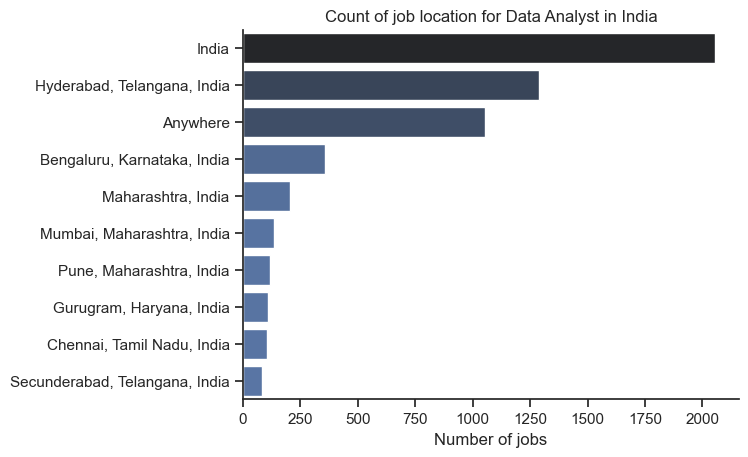

In [11]:
df_plot=df_DA_IND['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of job location for Data Analyst in India')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

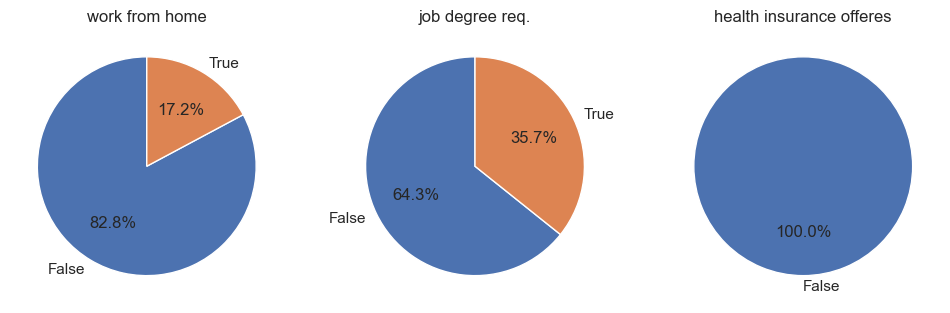

In [16]:
dict_column={
    'job_work_from_home': 'work from home',
    'job_no_degree_mention':'job degree req.',
    'job_health_insurance':'health insurance offeres'
}

fig, ax= plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_IND[column].value_counts()
    ax[i].pie(
        counts,
        startangle=90,
        autopct='%1.1f%%',
        labels=counts.index.astype(str)  # Convert labels to string
    )
    ax[i].set_title(title)
    
plt.show()


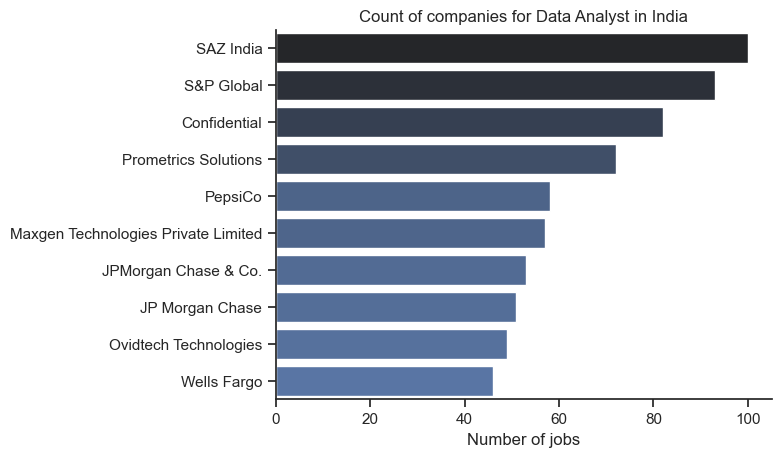

In [18]:
df_plot=df_DA_IND['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of companies for Data Analyst in India')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()